In [76]:
import pandas as pd
import numpy as np
import joblib

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [4]:
train_df = pd.read_csv("train.csv")  # Replace with actual file name
train_df.drop(["id", "CustomerId", "Surname"], axis=1, inplace=True)
print(train_df.head())
print(train_df.info())

   CreditScore Geography Gender   Age  Tenure    Balance  NumOfProducts  \
0          668    France   Male  33.0       3       0.00              2   
1          627    France   Male  33.0       1       0.00              2   
2          678    France   Male  40.0      10       0.00              2   
3          581    France   Male  34.0       2  148882.54              1   
4          716     Spain   Male  33.0       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        1.0             0.0        181449.97       0  
1        1.0             1.0         49503.50       0  
2        1.0             0.0        184866.69       0  
3        1.0             1.0         84560.88       0  
4        1.0             1.0         15068.83       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Cre

In [5]:
le_Geography = LabelEncoder()
le_Gender = LabelEncoder()

# Fit on train data and transform both train and test to avoid mismatch
train_df['Geography'] = le_Geography.fit_transform(train_df['Geography'])
train_df['Gender'] = le_Gender.fit_transform(train_df['Gender'])

print(train_df.head())

   CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          668          0       1  33.0       3       0.00              2   
1          627          0       1  33.0       1       0.00              2   
2          678          0       1  40.0      10       0.00              2   
3          581          0       1  34.0       2  148882.54              1   
4          716          2       1  33.0       5       0.00              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        1.0             0.0        181449.97       0  
1        1.0             1.0         49503.50       0  
2        1.0             0.0        184866.69       0  
3        1.0             1.0         84560.88       0  
4        1.0             1.0         15068.83       0  


In [6]:
features = ["CreditScore", "Geography", "Gender", "Age", "Balance",
            "NumOfProducts", "IsActiveMember",]

X = train_df[features]   # Select only these columns as features
y = train_df["Exited"]   # Target column

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [72]:
model = DecisionTreeClassifier(
    criterion='entropy',        # Better than 'gini' sometimes
    max_depth=8,              # Prevents overfitting
    min_samples_split=7,       # Splits only if node has 10+ samples
    min_samples_leaf=5,         # Keeps leaves from being too small
    max_features=None,          # You can try 'sqrt' or 'log2' for control
    class_weight='balanced',    # Helpful if data is imbalanced
    splitter='best',
    random_state=42
)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_leaf=5, min_samples_split=7,
                       random_state=42)

In [73]:
y_pred = model.predict(X_val)

In [74]:
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

Accuracy: 0.8115854212742751
Confusion Matrix:
 [[21303  4749]
 [ 1470  5485]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.82      0.87     26052
           1       0.54      0.79      0.64      6955

    accuracy                           0.81     33007
   macro avg       0.74      0.80      0.76     33007
weighted avg       0.85      0.81      0.82     33007



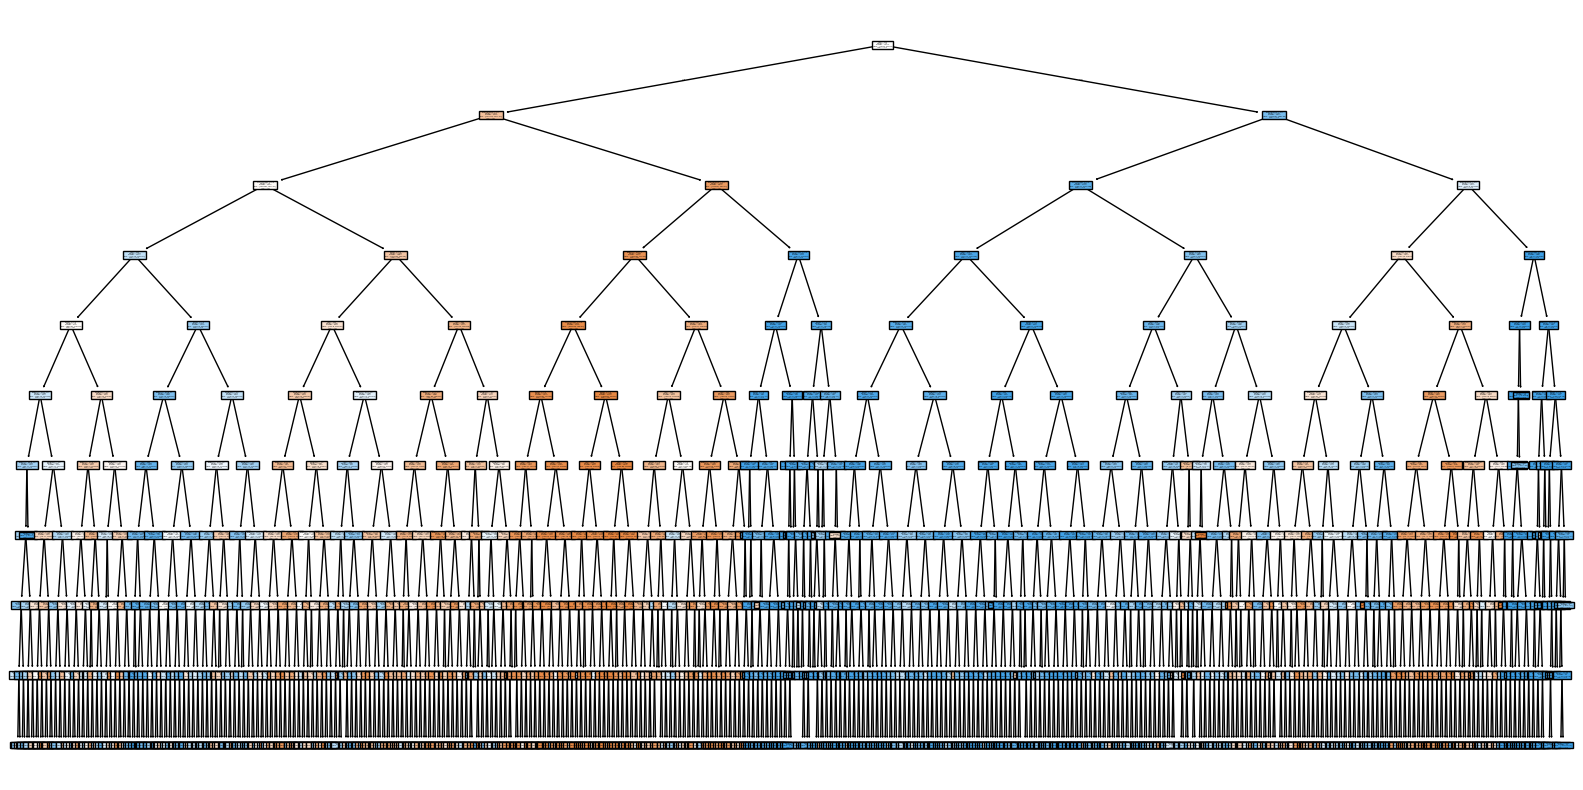

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Stay", "Churn"])
plt.show()


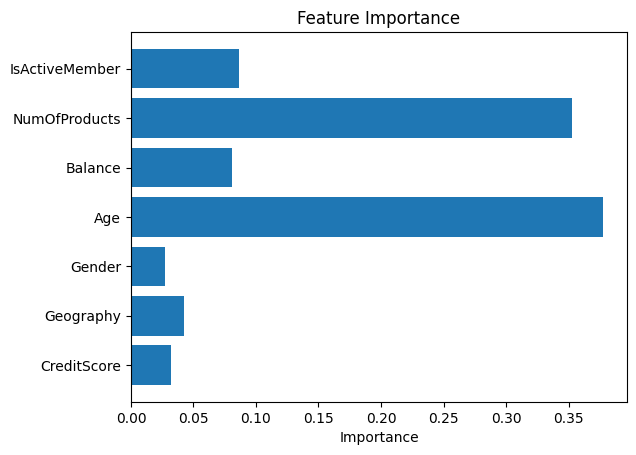

In [11]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


In [77]:
# Save the trained model
joblib.dump(model, 'Customer-Churn-Predictor.pkl')
print("Model saved as Customer-Churn-Predictor.pkl")

Model saved as Customer-Churn-Predictor.pkl
